# Multiple Regression Algorithm 

**Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.
multiple regression model is of the form
$Y=\beta_0+\beta_1*X1+\beta2*X2+....+\beta_p*Xp+\epsilon$**

### Problem Statement

**The question involve the use of multiple linear regression on the auto dataset.**

**Importing the required libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sympy as sym
#init_printing()   # the function init_printing() will enable Latex pretty printing in the notebook for sympy.

In [2]:
data=pd.read_csv("auto-mpg.csv")
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Data Description

 **In the given Auto dataset mpg(Miles per gallon) is an continuous variable/ Response variable.**
- Mpg- it is the fuel efficiency.
- Cylinder- Number of cylinder between 4 and 8.
- Displacement- Engine dispacement.
- Horsepower- power of an engine.
- Acceleration - Time to accelerate from 0 to 60 mph.
- Origin - (1. American, 2.European,3.japanese)

 **For Size of the dataset.**

In [3]:
print(data.shape)

(398, 9)


**For Printing first 5 value.**

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
print(data.describe().T)

              count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model year      79.000    82.0  
origin           2.000     3.0  


**Here is the absence of Horsepower column it suggest that there is some data issue.**

**For finding ? value in horsepower column**

In [6]:
data[data.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


**For replacing ? with Nan value**

In [7]:
data['horsepower']=data['horsepower'].replace('?',np.nan).astype(float)   # astype is used to change the datatype


In [8]:
data.isna().sum()    # For detecting nan value

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**Replacing Nan value with the median.**

In [9]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

In [10]:
data.isna().sum()    

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

#### Here Nan Value is replaced by median

**Produce scatterplot matrix which includes all of the variables in the data.**

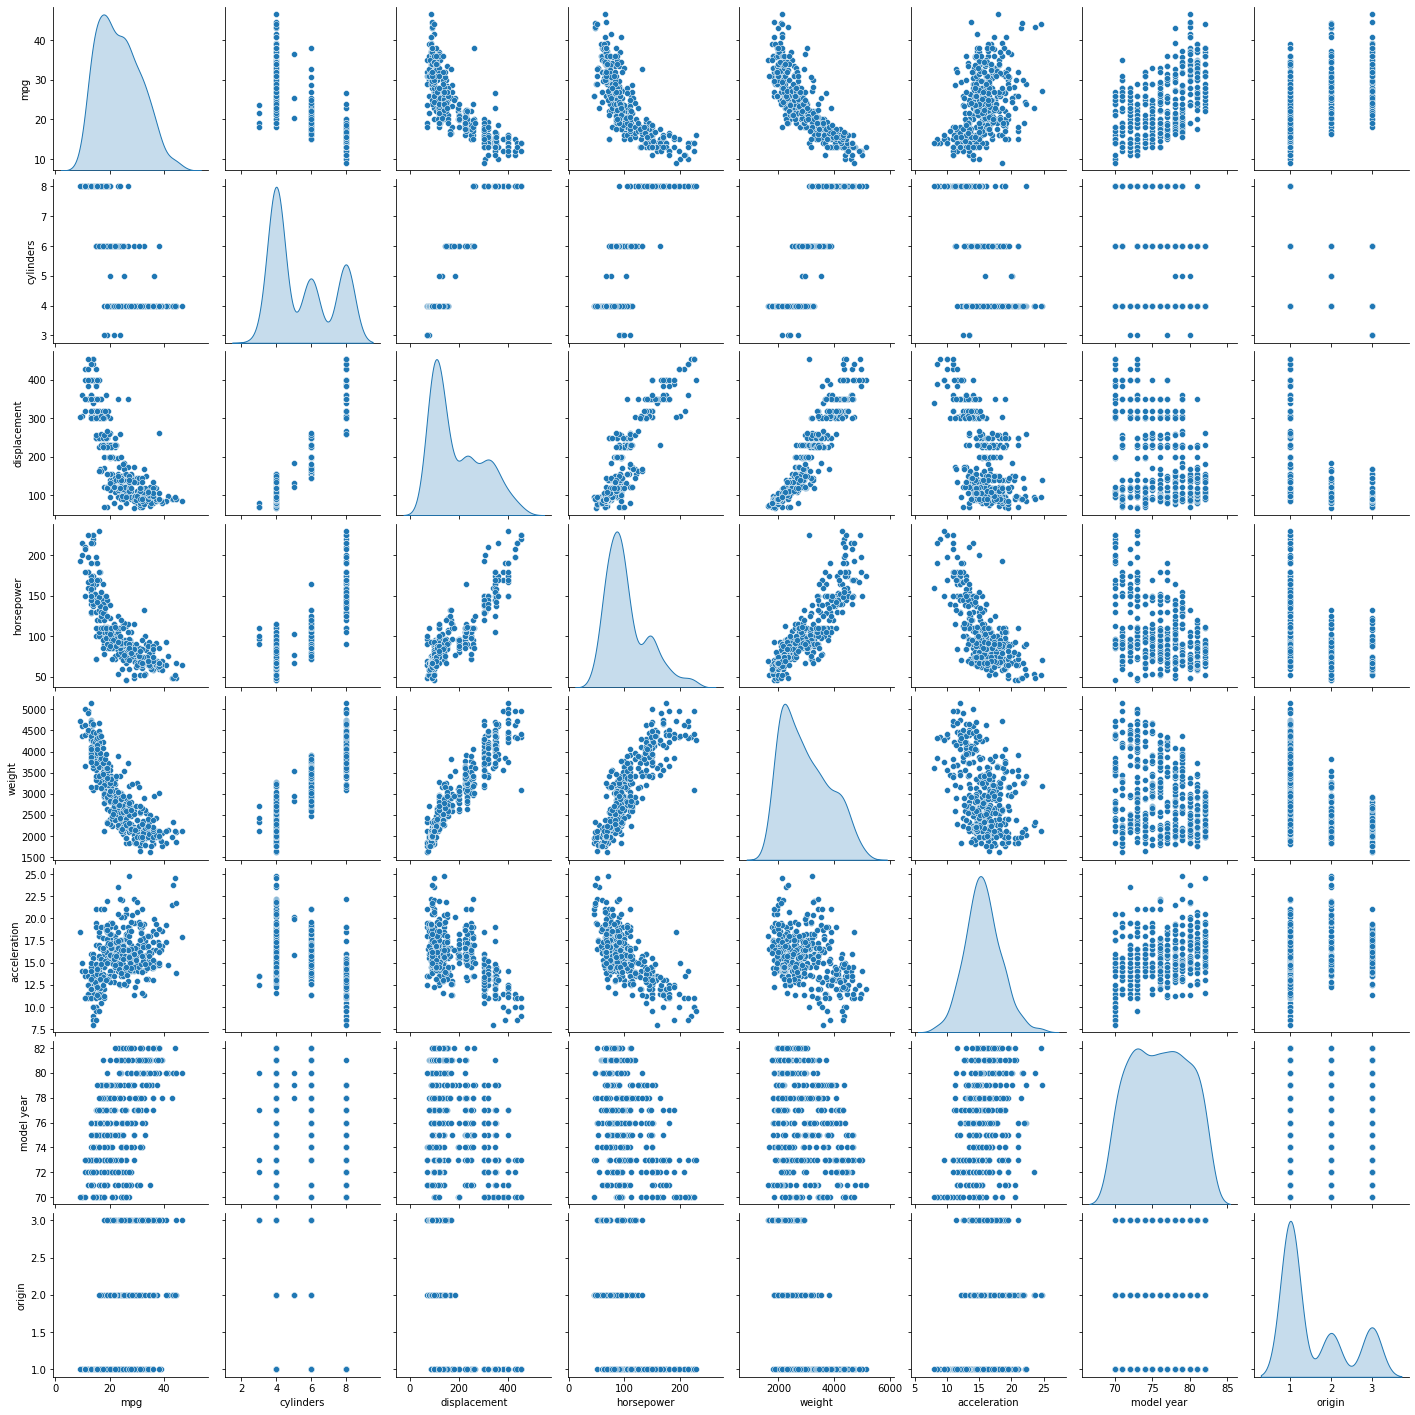

In [43]:
sns.pairplot(data,diag_kind='kde')

**There is linear relationship between displacement with horsepower and weight.**

**Compute the matrix of correlation between variables using the function corr(). you will need to exclude the car name var.**

<AxesSubplot:>

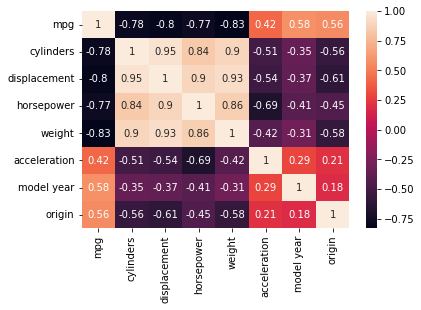

In [12]:
data_cor=data.iloc[:,:-1]   # Exclude car_name qualitative variable.
data_cor
sns.heatmap(data_cor.corr(),annot=True)

**There is strong relation between dispacement ,cylinder,weight comparing to other variable.**
**The mpg is also strongly correlated to weight,displacement and cylinder.  ##Very strong +ve is -1.00 to -0.80.**

### Perform Multiple linear regression with mpg as the respose and all other variables except car name as the predictor

In [13]:
x=data.drop(['mpg','car name'],axis=1)   #axis=1 represents columns
y=data['mpg'].values


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
ypred=model.predict(x_test)


 **Calculating the coefficients.**

In [18]:
print(model.coef_)    #B1,B2,B3,B4,B5,B6,B7.

[-0.39807378  0.02143196 -0.0200209  -0.00644211  0.19392166  0.74539733
  1.57191264]


In [20]:
#a=symbols()
#z1,z2,z3,z4,z5,z6,z7=sym.Symbols('beta1','beta2','beta3','beta4','beta5','beta6','beta7')

**The coefficient for cylinder is $\beta_1$ = -0.39807378.**

**The coefficient for displacement is $\beta_2$ 0.02143196.**

**The coefficient for horspower is  $\beta_3$ -0.0200209.**

**The coefficient for weight is  $\beta_4$ -0.00644211.**

**The coefficient for accleration is  $\beta_5$ 0.1939266.**

**The coefficient for model year is  $\beta_6$ 0.74539733.**

**The coefficient for origin is  $\beta_7$ 1.57191266.**

**Calculate the Intercept.**

In [46]:
print(model.intercept_)  #$\beta_0$

-19.49709228815518


**The intercept for our model $\beta_0$ -19.49709228815518.**

In [47]:
### for printing R^2,

In [48]:
from sklearn.metrics import r2_score
Rsquare=r2_score(y_test,ypred)
Rsquare

0.8194884044248797

**81% variability is explained by the model.**

**For Printing Summary**

In [21]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)   #dependent variable is also concerned by the constant term 'a'.Hence we add constant term.
x_train_lm                            #y=a+b*x

C:\Users\one\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin
64,1.0,8,318.0,150.0,4135,13.5,72,1
55,1.0,4,97.0,60.0,1834,19.0,71,2
317,1.0,4,97.0,78.0,2188,15.8,80,2
102,1.0,4,97.0,46.0,1950,21.0,73,2
358,1.0,4,120.0,74.0,2635,18.3,81,3
...,...,...,...,...,...,...,...,...
323,1.0,4,156.0,105.0,2800,14.4,80,1
192,1.0,6,250.0,105.0,3353,14.5,76,1
117,1.0,4,68.0,49.0,1867,19.5,73,2
47,1.0,6,250.0,100.0,3282,15.0,71,1


**For printing result.**

In [22]:
Result=sm.OLS(y_train,x_train_lm).fit()

In [23]:
print(Result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     200.2
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          5.37e-111
Time:                        21:11:44   Log-Likelihood:                -831.29
No. Observations:                 318   AIC:                             1679.
Df Residuals:                     310   BIC:                             1709.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.4971      5.184     -3.761   

**Interpretation**

**From $R^2$ value the model is good fitted. There is 81% variation of the all predictors such as cylinder,weight 
is explained by the mpg variable.**

**$R^2$ adj value is 0.815 so its very well fitted model.**

**Here, $R^2$ and $Adj R^2$ are close enough then we have selected relvent predictor.**

**Test of significance of overall regression model.**

$H_0:\beta_1=B_2=B3=B4=B5=B6=B7=0$
Vs

**$H_1: \beta_j!= 0$ for at least one j.**

**Here F-statistics is 200.2. And P_value is close to 0. Hence we Reject H0.**

**There is linear relationship between all the predictors and response variable mpg.**

**Which predictor appears to have statistically significant realtionship to the response?**

**From the t-test we decided that the given feature is significant to the target variable.**

**$H_0= \beta_1=0$ vs $H1:\beta_1!=0$**

**The p-value of dispalcement,weight,year and origin shows that they have statistically significant relationship to the mpg.**

**Variance Inflation Factor**

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#the independent variables set.
X=data[['displacement','weight','acceleration','model year','origin']]
#VIF Dataframe
vif_data=pd.DataFrame()
vif_data['features']=X.columns
#Calculate VIF for each feature.
vif_data['VIF']=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]
print(vif_data)

       features         VIF
0  displacement   47.302622
1        weight  113.413924
2  acceleration   50.118246
3    model year   87.775314
4        origin    7.476012


**Here is the VIF is greater than 5 or 10 so the Multicollinearity is prsent in the above regressors.
We used here PCA technique**

**principal component analysis(pca) is a technique for reducing the dimensionality of
such datasets, increasing interpretability but at the sametime minimizing information loss.
pca is statistial procedure thatallows you to summarize the information content in large data tables by means of a smaller set 
of summary indices that can be more easily visualized and analyzed. using pca can identify the corralation between the data 
points.**

In [33]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)    

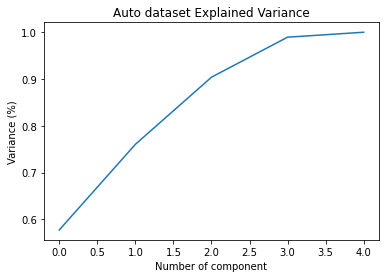

In [37]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_std)
#plotting the cummulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of component")
plt.ylabel("Variance (%)")   #for each component
plt.title("Auto dataset Explained Variance")
plt.show()

**used for standanrdized the inputs by removing mean value from every value for that column and dividing it by the variance that exists for that column.Plot the overall Variance explained by each component
 When we apply PCA the only difference is rather than plotting individual contributions We plot overall cumulative sum of the contributions,So the sum total of contribution turns out to be 1 or 100% the here the first principal component value is greather than 0.76 and other values are add up to the total of 1**

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.57756513, 0.76046924, 0.90393239, 0.98946106, 1.        ])

### What does the coefficient for the year variable suggest ?

In [ ]:
The coeffient of effect suggest that If your model year is increases by one yr, the average 

### For Residual plot

Text(0.5, 1.0, 'Residual_plots')

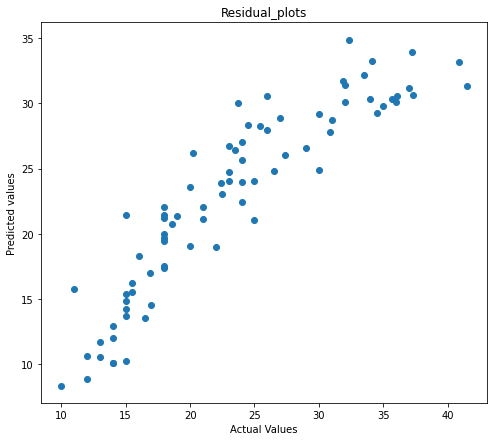

In [50]:
plt.figure(figsize=(8,7))
plt.scatter(y_test,ypred)
residual=y_test-ypred

plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Residual_plots")   # It is deviation between Actual and predicted values

C:\Users\one\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

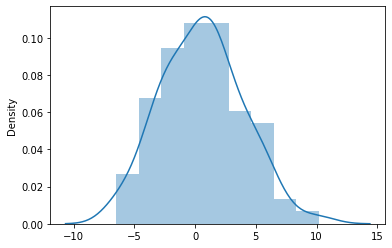

In [21]:
sns.distplot(residual)

#### Normality Assumption is satisfied

**Best Subset Selection method-Stepwise  Regression**

In [39]:
import statsmodels.api as sm
def stepwise_selection(x,y,
                      initial_list=[]
                      threshold_in=0.01,
                      threshold_out=0.05,
                      verbose=True):
    result=stepwise_selection(x,y)
    print('resulting features:')
    print(result)

SyntaxError: invalid syntax (Temp/ipykernel_2648/2800062851.py, line 4)